In [1]:
### Internet Firewall Data

### Additional Information


##### There are 12 features in total. Action feature is used as a class. There are 4 classes in total. These are allow, action, drop and reset-both classes.

In [2]:
###!pip install keras-tuner

In [3]:
###! unzip /content/internet+firewall+data.zip

In [4]:
###! pip install tensorflow
###! pip install bayesian-optimization

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
###from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [6]:
log_data = pd.read_csv("/content/log2.csv")

In [7]:
log_data.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [8]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
training_data, testing_data = train_test_split(log_data, test_size = 0.3, random_state = 0)

In [11]:
print(training_data.shape, testing_data.shape)

(45872, 12) (19660, 12)


In [12]:
training_data['ID'] = training_data.index
testing_data['ID'] = testing_data.index


In [13]:
####! pip install matplotlib_venn
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

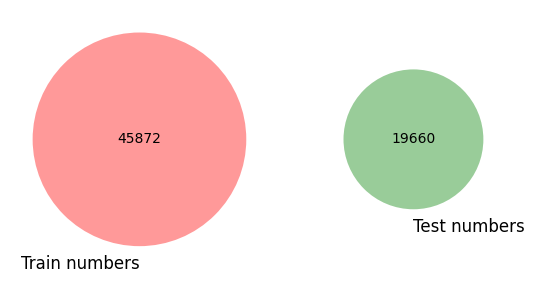

In [14]:
set_numbers_train = set(training_data[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
set_numbers_test = set(testing_data[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

In [15]:
num_var = [feature for feature in training_data.columns if training_data[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(training_data[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in training_data.columns if feature not in num_var]

In [16]:
###! pip install klib
###!pip install keras-tuner

In [17]:
import klib

In [18]:
training_data = klib.clean_column_names(training_data)
testing_data = klib.clean_column_names(testing_data)

GridSpec(6, 1)

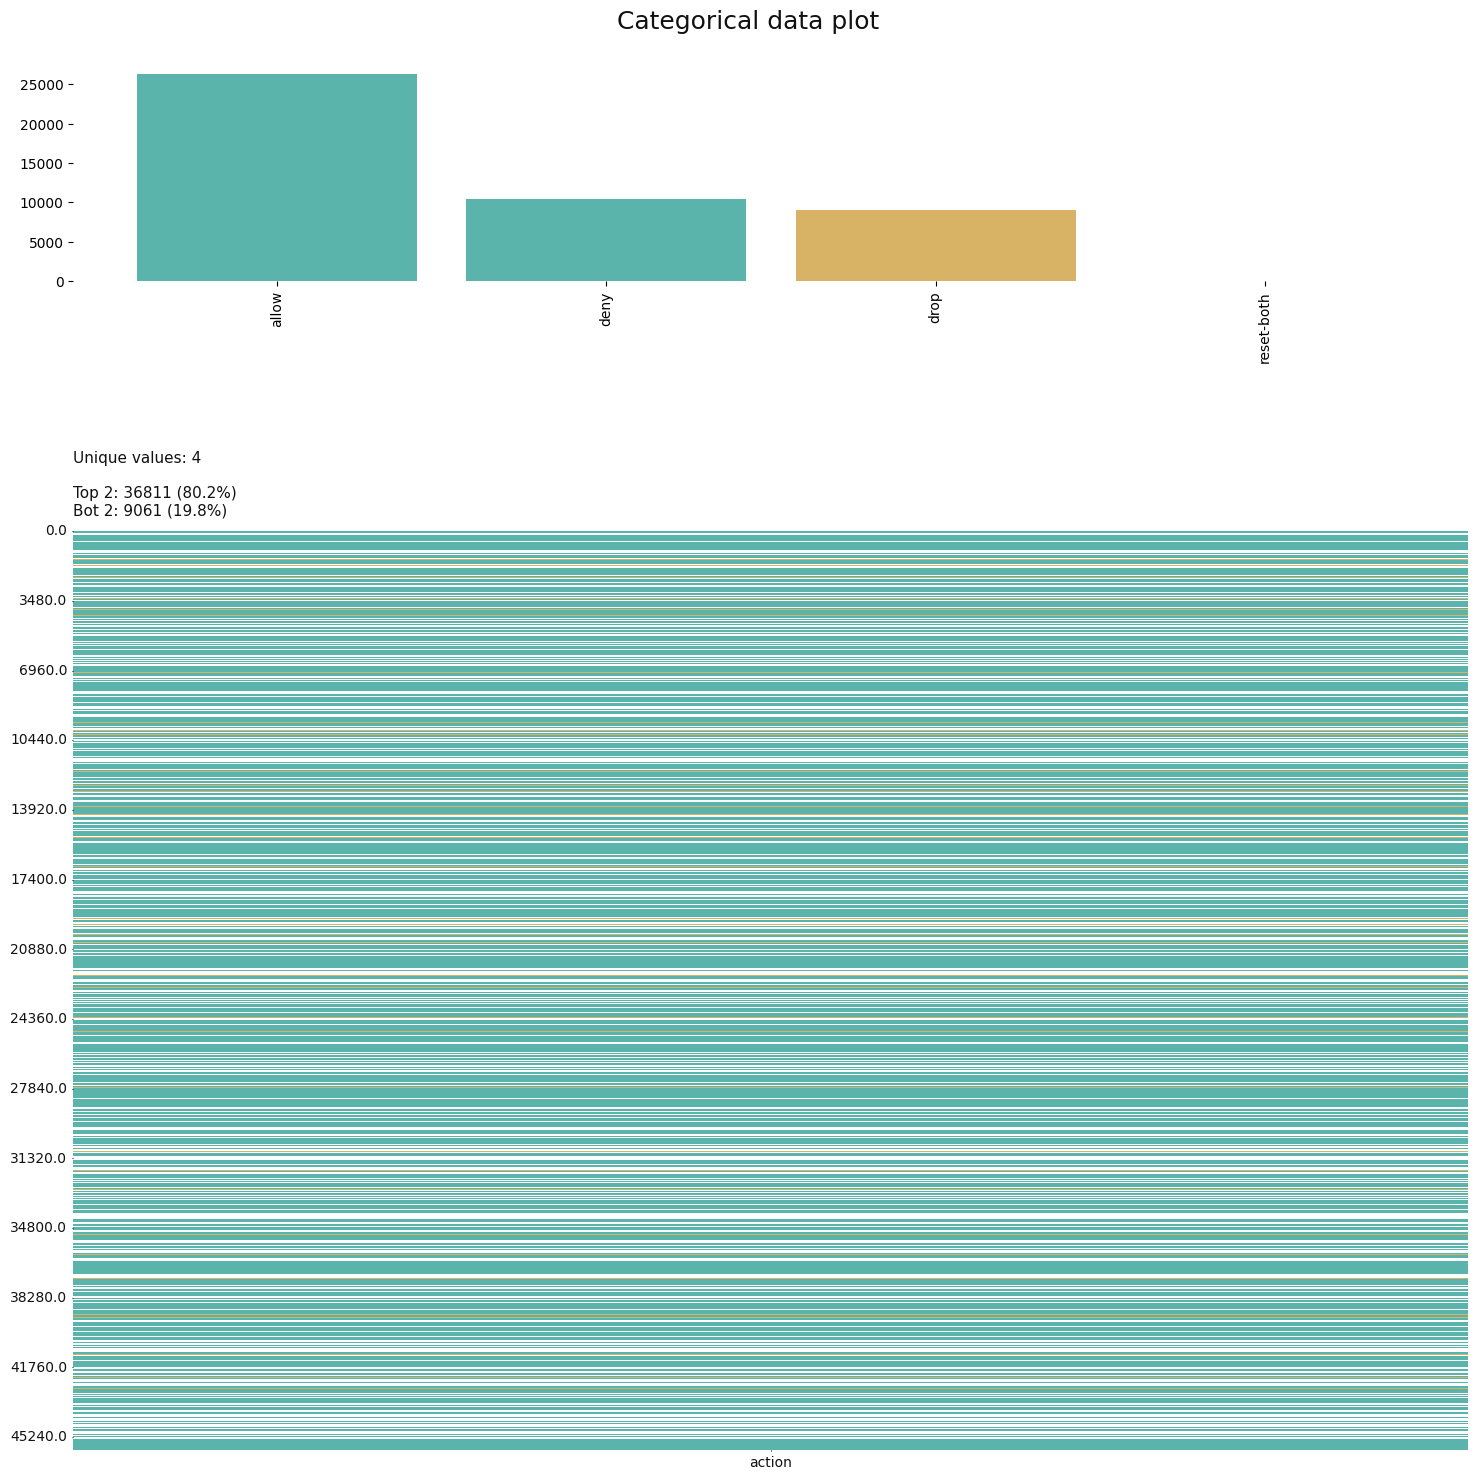

In [19]:
klib.cat_plot(training_data)

In [20]:
klib.corr_interactive_plot(training_data)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='source_port', ylabel='Density'>

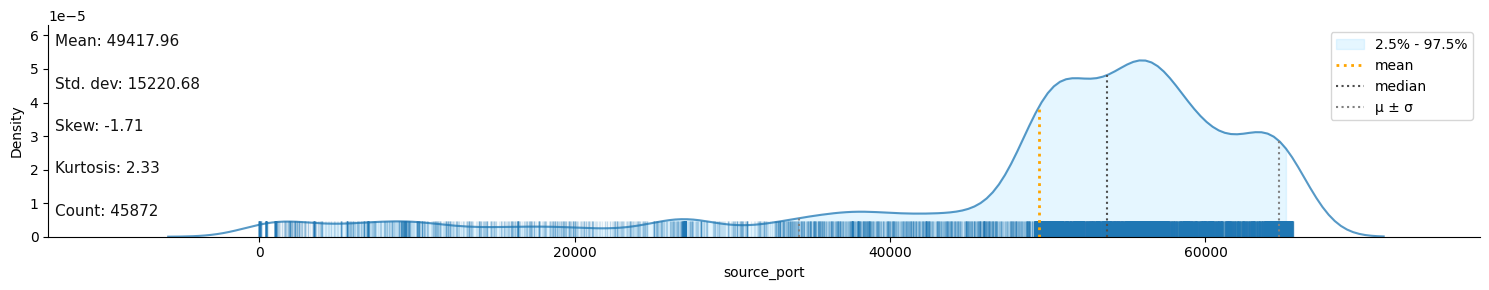

In [21]:
klib.dist_plot(training_data)

In [22]:
klib.missingval_plot(training_data)

No missing values found in the dataset.


In [23]:
klib.corr_mat(training_data)

,source_port,destination_port,nat_source_port,nat_destination_port,bytes,bytes_sent,bytes_received,packets,elapsed_time_sec,pkts_sent,pkts_received,id
source_port,1.00,-0.33,0.14,-0.03,-0.00,-0.00,0.00,-0.00,-0.05,-0.00,-0.00,-0.00
destination_port,-0.33,1.00,-0.28,0.41,-0.00,0.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01
nat_source_port,0.14,-0.28,1.00,0.18,0.01,0.00,0.02,0.01,0.14,0.01,0.02,0.01
nat_destination_port,-0.03,0.41,0.18,1.00,0.01,0.01,-0.00,0.01,0.22,0.01,0.00,0.03
bytes,-0.00,-0.00,0.01,0.01,1.00,0.96,0.86,0.97,0.16,0.99,0.85,-0.00
bytes_sent,-0.00,0.00,0.00,0.01,0.96,1.00,0.68,0.91,0.15,0.98,0.71,-0.00
bytes_received,0.00,-0.01,0.02,-0.00,0.86,0.68,1.00,0.89,0.14,0.80,0.94,0.00
packets,-0.00,-0.00,0.01,0.01,0.97,0.91,0.89,1.00,0.16,0.98,0.94,0.00
elapsed_time_sec,-0.05,0.02,0.14,0.22,0.16,0.15,0.14,0.16,1.00,0.16,0.14,0.02
pkts_sent,-0.00,-0.00,0.01,0.01,0.99,0.98,0.80,0.98,0.16,1.00,0.84,-0.00


In [24]:
training_data.columns

Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_sec', 'pkts_sent',
       'pkts_received', 'id'],
      dtype='object')

In [25]:
training_data['action'].value_counts()

allow         26311
deny          10500
drop           9021
reset-both       40
Name: action, dtype: int64

In [26]:
training_data['action'] = training_data['action'].astype('category').cat.codes
testing_data['action'] = testing_data['action'].astype('category').cat.codes

In [27]:
y_train = training_data['action']
x_train = training_data.drop('action', axis = 1)
y_test = testing_data['action']
x_test = testing_data.drop('action', axis = 1)

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x_train, y_train)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

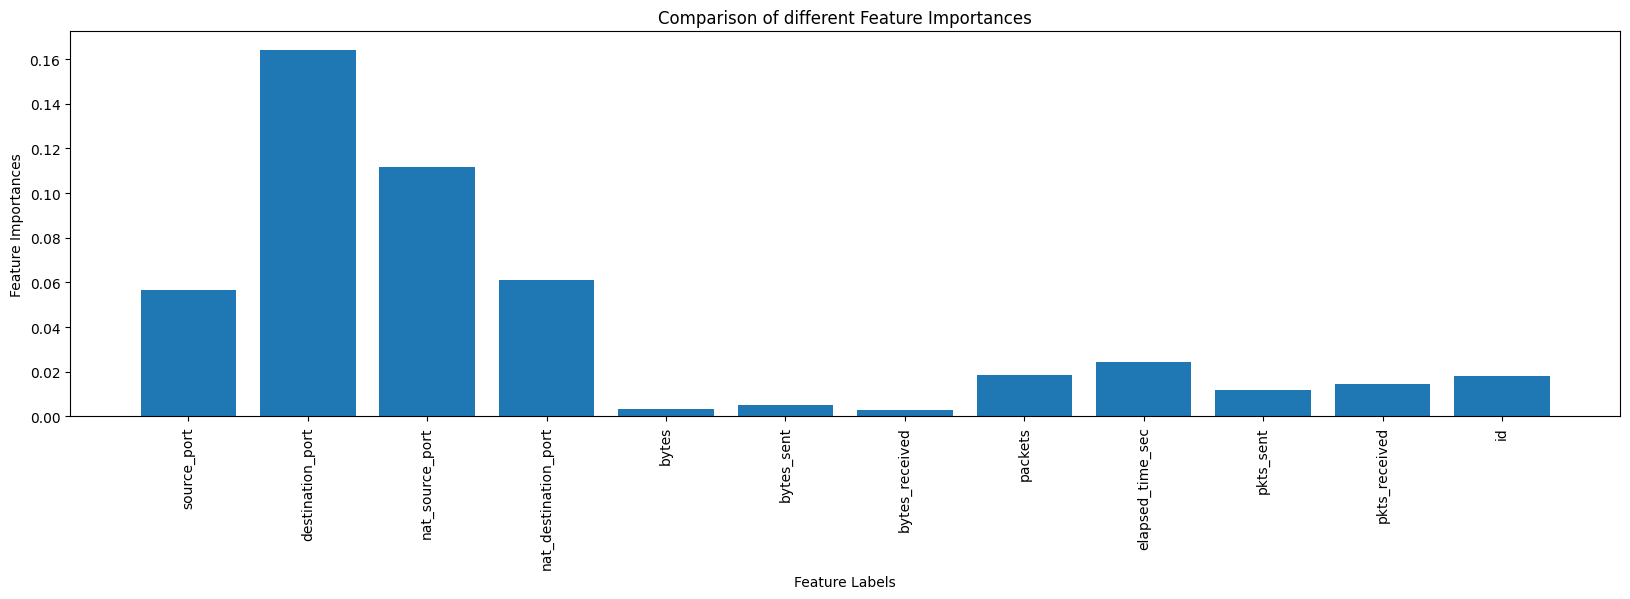

In [29]:
plt.figure(figsize = [20,5])
plt.bar(x_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation = 90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [30]:
print("The columns of the x_train :", x_train.columns)
print("The columns of the x_test :", x_test.columns)

The columns of the x_train : Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent', 'bytes_received',
       'packets', 'elapsed_time_sec', 'pkts_sent', 'pkts_received', 'id'],
      dtype='object')
The columns of the x_test : Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent', 'bytes_received',
       'packets', 'elapsed_time_sec', 'pkts_sent', 'pkts_received', 'id'],
      dtype='object')


In [31]:
x_train2 = x_train[['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent', 'bytes_received',
       'packets', 'elapsed_time_sec', 'pkts_sent', 'pkts_received']]

In [32]:
x_test2 = x_test[['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent', 'bytes_received',
       'packets', 'elapsed_time_sec', 'pkts_sent', 'pkts_received']]

In [33]:
print(x_train2.shape, x_test2.shape)
print(y_train.shape, y_test.shape)

(45872, 11) (19660, 11)
(45872,) (19660,)


In [34]:
x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train2),columns=x_train2.columns)
x_train_scaled.head()

,source_port,destination_port,nat_source_port,nat_destination_port,bytes,bytes_sent,bytes_received,packets,elapsed_time_sec,pkts_sent,pkts_received
0,-2.180475,-0.569657,2.054633,-0.268656,-0.016510,-0.006701,-0.031169,-0.018838,-0.119767,-0.012728,-0.026774
1,0.454783,-0.569657,0.065832,-0.268656,-0.016425,-0.006695,-0.030954,-0.018838,-0.119767,-0.012728,-0.026774
2,0.993727,-0.548428,-0.875864,-0.274092,-0.016534,-0.006702,-0.031227,-0.019005,-0.218119,-0.012728,-0.027192
3,0.674421,-0.548537,-0.525157,-0.228653,-0.014009,-0.005784,-0.026264,-0.013335,0.217905,-0.009084,-0.018833
4,0.169445,-0.548537,0.014337,-0.228653,-0.016138,-0.006325,-0.030883,-0.016003,-0.145994,-0.010125,-0.023848


In [36]:
x_test_scaled=pd.DataFrame(scaler.fit_transform(x_test2),columns=x_test2.columns)
x_test_scaled.head()

,source_port,destination_port,nat_source_port,nat_destination_port,bytes,bytes_sent,bytes_received,packets,elapsed_time_sec,pkts_sent,pkts_received
0,0.485799,-0.570590,0.622626,-0.269201,-0.029058,-0.055247,-0.028224,-0.036675,-0.105283,-0.066062,-0.029488
1,0.760103,-0.549362,-0.881930,-0.274656,-0.029110,-0.055957,-0.028263,-0.037180,-0.216630,-0.066062,-0.030055
2,-0.005824,-0.549470,1.785242,-0.229059,-0.028880,-0.055878,-0.028031,-0.032636,0.468324,-0.062850,-0.025525
3,-3.216500,-0.573461,-0.881930,-0.274656,-0.029097,-0.055326,-0.028263,-0.037180,-0.216630,-0.066062,-0.030055
4,0.204778,-0.549362,-0.881930,-0.274656,-0.029110,-0.055957,-0.028263,-0.037180,-0.216630,-0.066062,-0.030055


In [37]:
print(x_train_scaled.shape, x_test_scaled.shape)

(45872, 11) (19660, 11)


In [38]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
# Install libraries
#!pip install boostaroota
#!pip install h2o
#!pip install ppscore
#!pip install imblearn

In [ ]:
###! pip install optuna
###! pip install shap

In [41]:
###! pip install catboost

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn import model_selection as sk_model_selection
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
from sklearn import metrics
import optuna
from boostaroota import BoostARoota
from sklearn.metrics import log_loss
from optuna.samplers import TPESampler
import functools
from functools import partial
import xgboost as xgb
import joblib
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import statsmodels.api as sm
import pylab
from xgboost import plot_tree
import shap
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, auc, f1_score, \
    average_precision_score, accuracy_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import h2o
from h2o.automl import H2OAutoML
from catboost import Pool, CatBoostRegressor, cv
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Multiply
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


SEED = 42

In [43]:
print(x_train_scaled.columns)

Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent', 'bytes_received',
       'packets', 'elapsed_time_sec', 'pkts_sent', 'pkts_received'],
      dtype='object')


In [44]:
print(x_test_scaled.columns)

Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent', 'bytes_received',
       'packets', 'elapsed_time_sec', 'pkts_sent', 'pkts_received'],
      dtype='object')


In [46]:
feature_cols = ['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent', 'bytes_received',
       'packets', 'elapsed_time_sec', 'pkts_sent', 'pkts_received']

In [47]:
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
try:
    from imblearn.over_sampling import ADASYN
except:
    pass
try:
    import ppscore as pps
except:
    pass

from imblearn.over_sampling import ADASYN

In [48]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp549271s2
  JVM stdout: /tmp/tmp549271s2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp549271s2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"14 days, 15 hours and 1 minute"
H2O_cluster_name:,H2O_from_python_unknownUser_03hnud
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [50]:
print(training_data.shape, testing_data.shape)

(45872, 13) (19660, 13)


In [51]:
h2o_train_df = h2o.H2OFrame(training_data)
h2o_test_df = h2o.H2OFrame(testing_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [68]:
aml = H2OAutoML(max_models = 35, seed = 100, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)

In [69]:
training_data.columns

Index(['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'action', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_sec', 'pkts_sent',
       'pkts_received', 'id'],
      dtype='object')

In [70]:
features = ['source_port', 'destination_port', 'nat_source_port',
       'nat_destination_port', 'bytes', 'bytes_sent',
       'bytes_received', 'packets', 'elapsed_time_sec', 'pkts_sent',
       'pkts_received', 'id']
output = 'action'

In [71]:
####aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)


In [72]:
aml.train(x = features, y = output, training_frame = h2o_train_df)

AutoML progress: |
06:40:09.600: Project: AutoML_3_20240328_64009
06:40:09.600: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:40:09.601: Setting stopping tolerance adaptively based on the training frame: 0.004669024600707204
06:40:09.601: Build control seed: 100
06:40:09.602: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
06:40:09.730: training frame: Frame key: AutoML_3_20240328_64009_training_Key_Frame__upload_aaba0f1e5012a7bc9b395642c7884068.hex    cols: 13    rows: 41205  chunks: 1    size: 1772731  checksum: 1279235287024275308
06:40:09.732: validation frame: Frame key: AutoML_3_20240328_64009_validation_Key_Frame__upload_aaba0f1e5012a7bc9b395642c7884068.hex    cols: 13    rows: 4667  chunks: 1    size: 145641  checksum: 207833772594053508
06:40:09.732: leaderboard frame: Frame key: AutoML_3_20240328_64009_validation_Key_Frame__uploa

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20240328_64009_model_21


Model Summary: 
    number_of_trees
--  -----------------
    85

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.0009763918976882246
RMSE: 0.031247270243786488
MAE: 0.003987444401535138
RMSLE: 0.01371927909419342
Mean Residual Deviance: 0.0009763918976882246

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.002240620479543043
RMSE: 0.047335192822497756
MAE: 0.0050565560749740055
RMSLE: 0.020514000108549514
Mean Residual Deviance: 0.002240620479543043

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-03-28 06:46:00  16.307 sec  0                  0.805985         0.698932        0.649612             0.799447           0.6937            0.639115
    2024-03-28 06:46:01  16.662 sec  5                  0.15981          0.123489        0.0255393            0.15692            0.121588          0.0246238
    2024-03-28 06:46:01  16.901 sec  10                 0.0656284        0.0256287       0.00430709           0.0624098          0.0248884         0.00389498
    2024-03-28 06:46:01  17.256 sec  15                 0.0539931        0.00965661      0.00291526           0.0558399          0.00961483        0.00311809
    2024-03-28 06:46:02  17.584 sec  20                 0.0471847        0.00573708      0.0022264            0.0514452          0.00612173        0.0026466
    2024-03-28 06:46:02  18.018 sec  25                 0.0436871        0.00485988      0.00190857           0.0508139          0.00548264        0.00258205
    2024-03-28 06:46:03  18.509 sec  30                 0.0415923        0.00464681      0.00172992           0.0508517          0.00536987        0.00258589
    2024-03-28 06:46:03  19.066 sec  35                 0.0397478        0.00456103      0.00157988           0.0500003          0.00533171        0.00250003
    2024-03-28 06:46:04  19.680 sec  40                 0.0389226        0.00448778      0.00151497           0.049454           0.0053175         0.0024457
    2024-03-28 06:46:05  20.410 sec  45                 0.0371467        0.00436401      0.00137988           0.0488332          0.00524795        0.00238468
    2024-03-28 06:46:05  21.167 sec  50                 0.0355216        0.00427425      0.00126178           0.0481956          0.00515482        0.00232282
    2024-03-28 06:46:06  21.990 sec  55                 0.0347546        0.00423325      0.00120788           0.0479749          0.00513971        0.00230159
    2024-03-28 06:46:07  22.861 sec  60                 0.0332499        0.0041165       0.00110555           0.0474048          0.00502112        0.00224721
    2024-03-28 06:46:08  23.803 sec  65                 0.0327012        0.00414293      0.00106937           0.0471729          0.00508252        0.00222529
    2024-03-28 06:46:11  26.639 sec  70                 0.0323629        0.00407892      0.00104736           0.0471215          0.0050358         0.00222043
    2024-03-28 06:46:12  27.728 sec  75                 0.0320142        0.00407901      0.00102491           0.0471847          0.00506781        0.0022264
    2024-03-28 06:46:13  28.980 sec  80                 0.031783         0.0040396       0.00101016           0.0472405          0.00506566        0.00223167
    2024-03-28 06:46:14  30.259 sec  85                 0.0312473        0.00398744      0.000976392          0.0473352          0.00505656        0.00224062

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
nat_

#### Model leaderboard

In [73]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_3_20240328_64009_model_21,0.0473352,0.00224062,0.00505656,0.020514,0.00224062
XGBoost_grid_1_AutoML_3_20240328_64009_model_2,0.0493608,0.00243649,0.0056893,0.021824,0.00243649
XGBoost_grid_1_AutoML_3_20240328_64009_model_23,0.0502706,0.00252713,0.00509965,0.0207406,0.00252713
XGBoost_grid_1_AutoML_3_20240328_64009_model_20,0.0505117,0.00255143,0.00607253,0.0211259,0.00255143
XGBoost_grid_1_AutoML_3_20240328_64009_model_32,0.0506304,0.00256344,0.00665727,0.0228836,0.00256344
XGBoost_3_AutoML_3_20240328_64009,0.0507683,0.00257742,0.00570148,0.0218468,0.00257742
XGBoost_grid_1_AutoML_3_20240328_64009_model_37,0.0509899,0.00259997,0.00391113,0.0217898,0.00259997
XGBoost_grid_1_AutoML_3_20240328_64009_model_42,0.0511457,0.00261589,0.0068999,0.0212999,0.00261589
XGBoost_grid_1_AutoML_3_20240328_64009_model_9,0.0511467,0.00261598,0.00484737,0.0216486,0.00261598
XGBoost_grid_1_AutoML_3_20240328_64009_model_35,0.0511758,0.00261896,0.00477033,0.0207514,0.00261896


In [84]:
preds = aml.predict(h2o_test_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [85]:
preds.columns

['predict']

In [86]:
preds.head(2)

predict
3.55282e-05
2.00066


In [ ]:
sub = preds[0].as_data_frame()

In [89]:
sub["predict"] = sub.predict.apply(np.round)

In [92]:
sub["predict"] = sub["predict"].astype(int)

In [93]:
sub["predict"].value_counts()

0    11329
1     4477
2     3851
3        3
Name: predict, dtype: int64